In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
def search(dirname):
    filenames = os.listdir(dirname)
    return filenames

def parse_result(models):

    data_array = []
    for model_name in models:
        # data = {'it', 'm', 'rmse', 'r2'}
        data = dict()
        str_arr = model_name.split('-')
        it_m = str_arr[0].split('_')
        iteration = int(it_m[1].replace('it', ''))
        model_num = int(it_m[2].replace('m',''))
        rmse = float(str_arr[1])
        r2 = float(str_arr[2])

        # if model_num > 2:
        #     continue
        data['it'] = iteration
        data['m'] = model_num
        data['rmse'] = rmse
        data['r2'] = r2
        data_array.append(data)

    df = pd.DataFrame(data_array)
    df = df.sort_values(by=['it'])
    result = df.groupby(['it']).mean()
    result = result.round(4)
    return result

In [45]:
models_max_diff = search('torch/rpo_comparison/al_ua_l1_max_diff0.5_n3_b64_e100_lr0.001_it10_R0.002_T1.0/model')
df_max_diff = parse_result(models_max_diff)

In [54]:
selected_columns = df_max_diff[['r2']]
result_df = selected_columns.copy()
result_df.rename(columns={'r2':'max_diff'}, inplace=True)
print(result_df)

    max_diff
it          
0     0.4205
1     0.5178
2     0.4337
3     0.5960
4     0.6669
5     0.5235
6     0.7206
7     0.7449
8     0.7778
9     0.7894
10    0.8091


In [56]:
models_random = search('torch/rpo_comparison/al_ua_l1_random0.5_n3_b64_e100_lr0.001_it10_R0.002_T1.0/model')
df_random = parse_result(models_random)
result_df['random'] = df_random['r2']



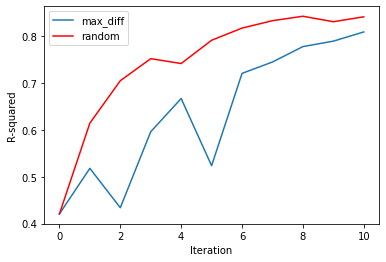

In [62]:

# gca stands for 'get current axis'
ax = plt.gca()

result_df.plot(kind='line',use_index=True,y='max_diff',ax=ax)
result_df.plot(kind='line',use_index=True,y='random', color='red', ax=ax)

plt.xlabel('Iteration')
plt.ylabel('R-squared')

plt.savefig('fig1.png', dpi=300)

plt.show()